## Plot averaged time series for card task

In [1]:
# load packages and set study specific variables
import os
import pandas as pd

#glm results path info
results_topdir = ".." #study directory
taskname = "cardtask"
feat_dir_format = "sub-%s/preproc2_basicnoaroma/basicnoaroma_run-01.feat" #later filled w/ sub (no leading "/")

group_list = ["POUD","Control"]
subject_groups = { 
    "POUD": ['601','603','604','606','607','608','609','610','611','612','613',
               '614','615','616','617','618','622','624','625','626','627','629','630'], #after each groupname include participant labels list
    "Control": ['801','802','803','804','806','807','809','810','811','812',
                '813','814','815','816','817','818','819','820','821','822','823']
} 
# design info
ev_list = ["ev1","ev2","ev3","ev4"]
ev_labels = {
    "ev1": "gain",
    "ev2": "loss",
    "ev3": "neut",
    "ev4": "input"
}
# how to reference: subject_groups[group_list[0]][1] gives '602'
full_subject_list = [item for sublist in subject_groups.values() for item in sublist] #collapses all into one list

# scan info
tr = .6

# how many time points to extract (starting with onset)
bins = 30 #18s after event

In [2]:
#roi info
roi_path = "/mnt/delgadolab/jamil/opiod_mita/analysis/cardtask/rois" #path to roi mask files
roi_list = [ "BMK_fig9_l_striat", "BMK_fig9_r_striat",
             "BMK_fig9_l_vmpfc", "BMK_fig9_r_vmpfc",
             "BMK_l_pcc", "BMK_r_pcc",
             "BMK_fig3A_l_amyg50_2mm","BMK_fig3A_r_amyg50_2mm",
             "BMK_fig3B_l_paracing50_2mm", "BMK_fig3B_r_paracing50_2mm",
             "BMK_fig3B_l_insula50_2mm", "BMK_fig3B_r_insula50_2mm"
           ] #name of roi masks (without ".nii.gz")

roi_labels = {
    "BMK_fig3A_l_amyg50_2mm": "lamyg",
    "BMK_fig3A_r_amyg50_2mm": "ramyg",
    "BMK_fig9_l_striat": "lstriat",
    "BMK_fig9_r_striat": "rstriat",
    "BMK_l_pcc": "lpcc",
    "BMK_r_pcc": "rpcc",
    "BMK_fig3B_l_paracing50_2mm": "lparacingulate",
    "BMK_fig3B_r_paracing50_2mm": "rparacingulate",
    "BMK_fig3B_l_insula50_2mm": "lainsula",
    "BMK_fig3B_r_insula50_2mm": "rainsula",
    "BMK_fig9_l_vmpfc": "lvmpfc",
    "BMK_fig9_r_vmpfc": "rvmpfc"
}
nii_extension = "nii.gz"

roi_outfile = "../rois/preproc2_roi_timeseries.csv"

In [3]:
# Takes ~4 hours - extract estimates and output to txt (stacked format, 1 row per estimate)
#alldata = pd.DataFrame(columns=["subject","group","roi_name","event","tr","value"])
for igroup, group in enumerate(group_list):
    for isub, subject in enumerate(subject_groups[group]):
        for iroi, roi in enumerate(roi_list):
            roi_file = "%s/%s.%s" %(roi_path,roi,nii_extension)
            feat_dir_stub = feat_dir_format % subject
            feat_dir = "%s/%s" % (results_topdir,feat_dir_stub)
            ts_outfile = "%s/ts_ROI_%s.txt" % (feat_dir,roi)
            meants_cmd = "fslmeants -i %s/filtered_func_data -o %s -m %s" % (feat_dir,ts_outfile,roi_file)
            print(subject,roi)
            if not(os.path.isfile(ts_outfile)):
                !{meants_cmd}

601 BMK_fig9_l_striat
601 BMK_fig9_r_striat
601 BMK_fig9_l_vmpfc
601 BMK_fig9_r_vmpfc
601 BMK_l_pcc
601 BMK_r_pcc
601 BMK_fig3A_l_amyg50_2mm
601 BMK_fig3A_r_amyg50_2mm
601 BMK_fig3B_l_paracing50_2mm
601 BMK_fig3B_r_paracing50_2mm
601 BMK_fig3B_l_insula50_2mm
601 BMK_fig3B_r_insula50_2mm
603 BMK_fig9_l_striat
603 BMK_fig9_r_striat
603 BMK_fig9_l_vmpfc
603 BMK_fig9_r_vmpfc
603 BMK_l_pcc
603 BMK_r_pcc
603 BMK_fig3A_l_amyg50_2mm
603 BMK_fig3A_r_amyg50_2mm
603 BMK_fig3B_l_paracing50_2mm
603 BMK_fig3B_r_paracing50_2mm
603 BMK_fig3B_l_insula50_2mm
603 BMK_fig3B_r_insula50_2mm
604 BMK_fig9_l_striat
604 BMK_fig9_r_striat
604 BMK_fig9_l_vmpfc
604 BMK_fig9_r_vmpfc
604 BMK_l_pcc
604 BMK_r_pcc
604 BMK_fig3A_l_amyg50_2mm
604 BMK_fig3A_r_amyg50_2mm
604 BMK_fig3B_l_paracing50_2mm
604 BMK_fig3B_r_paracing50_2mm
604 BMK_fig3B_l_insula50_2mm
604 BMK_fig3B_r_insula50_2mm
606 BMK_fig9_l_striat
606 BMK_fig9_r_striat
606 BMK_fig9_l_vmpfc
606 BMK_fig9_r_vmpfc
606 BMK_l_pcc
606 BMK_r_pcc
606 BMK_fig3A_l_amyg50

809 BMK_r_pcc
809 BMK_fig3A_l_amyg50_2mm
809 BMK_fig3A_r_amyg50_2mm
809 BMK_fig3B_l_paracing50_2mm
809 BMK_fig3B_r_paracing50_2mm
809 BMK_fig3B_l_insula50_2mm
809 BMK_fig3B_r_insula50_2mm
810 BMK_fig9_l_striat
810 BMK_fig9_r_striat
810 BMK_fig9_l_vmpfc
810 BMK_fig9_r_vmpfc
810 BMK_l_pcc
810 BMK_r_pcc
810 BMK_fig3A_l_amyg50_2mm
810 BMK_fig3A_r_amyg50_2mm
810 BMK_fig3B_l_paracing50_2mm
810 BMK_fig3B_r_paracing50_2mm
810 BMK_fig3B_l_insula50_2mm
810 BMK_fig3B_r_insula50_2mm
811 BMK_fig9_l_striat
811 BMK_fig9_r_striat
811 BMK_fig9_l_vmpfc
811 BMK_fig9_r_vmpfc
811 BMK_l_pcc
811 BMK_r_pcc
811 BMK_fig3A_l_amyg50_2mm
811 BMK_fig3A_r_amyg50_2mm
811 BMK_fig3B_l_paracing50_2mm
811 BMK_fig3B_r_paracing50_2mm
811 BMK_fig3B_l_insula50_2mm
811 BMK_fig3B_r_insula50_2mm
812 BMK_fig9_l_striat
812 BMK_fig9_r_striat
812 BMK_fig9_l_vmpfc
812 BMK_fig9_r_vmpfc
812 BMK_l_pcc
812 BMK_r_pcc
812 BMK_fig3A_l_amyg50_2mm
812 BMK_fig3A_r_amyg50_2mm
812 BMK_fig3B_l_paracing50_2mm
812 BMK_fig3B_r_paracing50_2mm
812 BM

In [5]:
# pull out numbers for event averaging
from io import StringIO
from csv import writer 

outputbuffer = StringIO()
csv_writer = writer(outputbuffer)
#time_df = pd.DataFrame({'id':[],'run':[],'roi':[],'event':[],'rep':[],'tr':[],'signal':[],'perc_change':[]})
row = [ "id", "roi", "event", "rep", "tr", "signal", "perc_change"]
csv_writer.writerow(row)

for subject in full_subject_list:
    print(f"{subject}")
    # get event onsets for this subject, convert seconds to nearest TR (e.g. for .6s TR, 1.2s=2) - 
    # not ideal for onsets that occur between TRs but we have to bin them to average them 
    feat_dir_stub = feat_dir_format % (subject)
    feat_dir = f"{results_topdir}/{feat_dir_stub}"
    # pull data for each roi
    for roi in roi_list:
        ts_file = f"{feat_dir}/ts_ROI_{roi}.txt"
        ts = pd.read_csv(ts_file,header=None,names=['value'])
        meansig = ts.mean().value
        for ev in ev_list:
            ev_info = pd.read_csv(f"{feat_dir}/custom_timing_files/{ev}.txt",delim_whitespace=True,header=None,names=['ons','dur','weight'])
            # handle possible empty ev
            if not(ev_info.shape[0]==1 and ev_info.loc[0,'ons']==0):
                ev_info['tr_ons'] = round(ev_info['ons']/tr).astype(int)
                for trialrep, onset in enumerate(ev_info['tr_ons']):
                    for binnum in range(bins):
                        if (onset+binnum) < ts.shape[0]:
                            signalval = ts.loc[onset+binnum,'value']
                            perc_changeval = 100*(signalval-meansig)/meansig
                            row = [f"{subject}",f"{roi_labels[roi]}",f"{ev_labels[ev]}",f"{trialrep}",
                                   f"{binnum}",f"{signalval}",f"{perc_changeval}"]
                            csv_writer.writerow(row)
outputbuffer.seek(0)
time_df = pd.read_csv(outputbuffer)

# this is an experiment specific hack to fill in group info, relying on the 
# numbering system for subjects in this experiment - it would be better to make
# a participant info csv and read the group info from there
##groupidhack
time_df['group'] = pd.cut(time_df['id'].astype(int),[599,799,899],labels=["POUD","Control"])
time_df['seconds'] = time_df['tr']*tr
time_df.to_csv(roi_outfile)

601
603
604
606
607
608
609
610
611
612
613
614
615
616
617
618
622
624
625
626
627
629
630
801
802
803
804
806
807
809
810
811
812
813
814
815
816
817
818
819
820
821
822
823


In [6]:
# save all extracted time series to text file
time_df.to_csv(roi_outfile, index=False)
#time_df = pd.read_csv(roi_outfile, index_col=0)

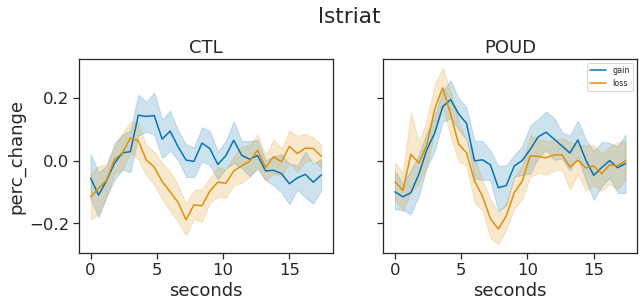

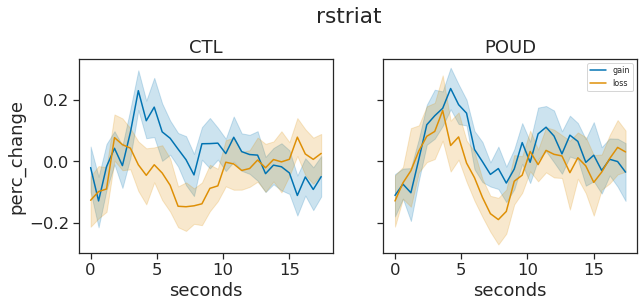

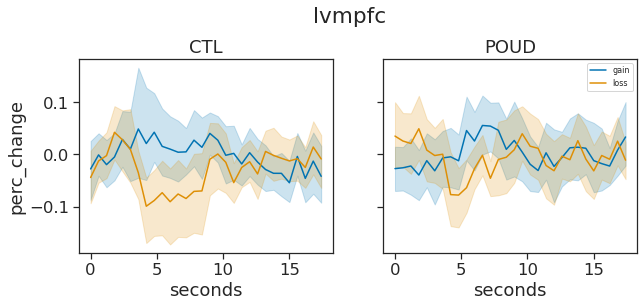

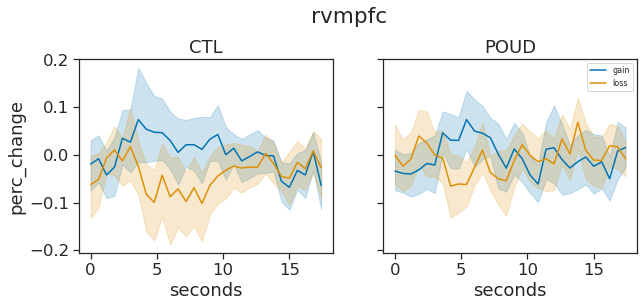

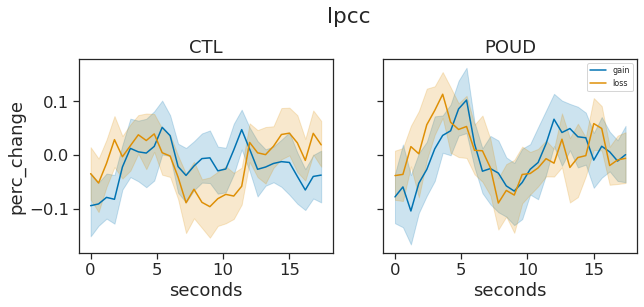

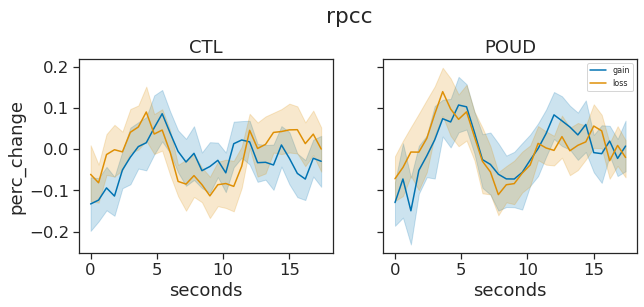

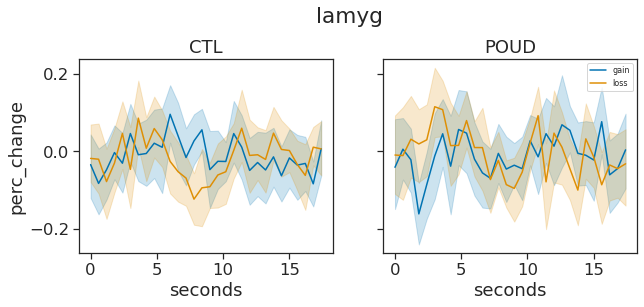

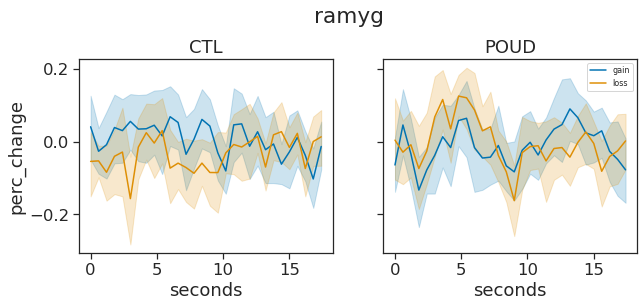

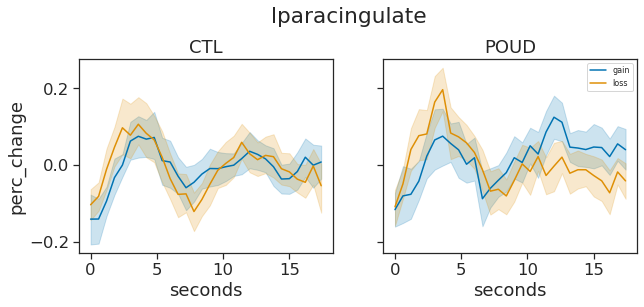

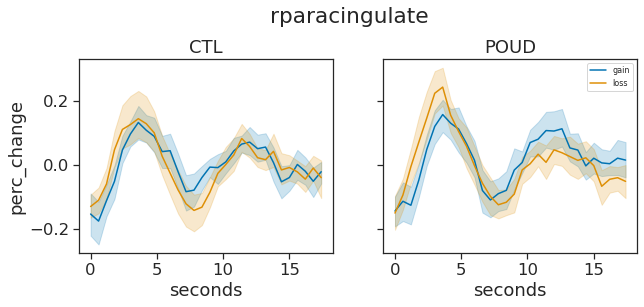

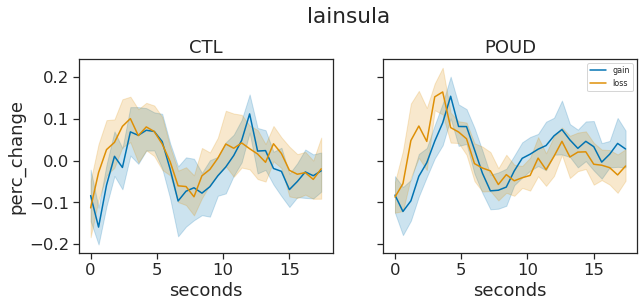

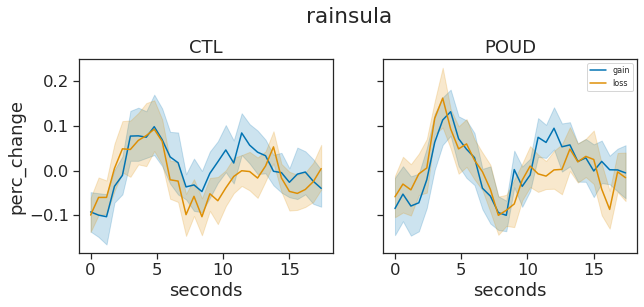

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=1.5)
sns.set_style("white")
sns.set_style("ticks")
sns.set_palette("colorblind") #

time_df['seconds'] = time_df['tr']*tr
time_df['group'] = pd.cut(time_df['id'].astype(int),[0,700,900],labels=["POUD","CTL"])
time_subavgs_df = time_df.groupby(['id','group','roi','event','seconds']).mean().reset_index()

for idx_roi, roi in enumerate(roi_list): 
    fig, axarr = plt.subplots(nrows=1, ncols=2, sharey=True, sharex=False, figsize=[10,4])
    fig.subplots_adjust(top=0.8)
    fig.suptitle(roi_labels[roi], y=.98)
    axarr[0].set_title("CTL")
    axarr[1].set_title("POUD")
    sns.lineplot(x="seconds", y="perc_change",hue='event', 
                 data=time_subavgs_df.loc[(time_subavgs_df['roi']==roi_labels[roi])&(time_subavgs_df['group']=="CTL")&
                                          ((time_subavgs_df['event']=="gain")|(time_subavgs_df['event']=="loss"))], 
                 ax=axarr[0], legend=None)
    sns.lineplot(x="seconds", y="perc_change",hue='event', 
                 data=time_subavgs_df.loc[(time_subavgs_df['roi']==roi_labels[roi])&(time_subavgs_df['group']=="POUD")&
                                          ((time_subavgs_df['event']=="gain")|(time_subavgs_df['event']=="loss"))], 
                 ax=axarr[1])
    axarr[1].legend(loc='upper right', fontsize=8)

In [8]:
# this is just a quick check of groupXtime effect on reward response, 
# but the package cannot do three-way mixed - must move
# the data to R to do the full groupXvalenceXtime
import pingouin
for roi in roi_list:
    # Compute the two-way mixed-design ANOVA
    aov = pingouin.mixed_anova(dv='perc_change', within='tr', between='group', subject='id', 
                               data=time_subavgs_df.loc[(time_subavgs_df['event']=='gain')&
                                                        (time_subavgs_df['roi']==roi_labels[roi])&
                                                        (time_subavgs_df['tr']<=30),:]
                              )
    # Pretty printing of ANOVA summary
    print(roi)
    pingouin.print_table(aov)

/home/bhanji/anaconda3/envs/envOpioidMVPA/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/home/bhanji/anaconda3/envs/envOpioidMVPA/lib/python3.8/site-packages/pingouin/parametric.py:1448: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[c] = data[c].astype(str)
/home/bhanji/anaconda3/envs/envOpioidMVPA/lib/python3.8/site-packages/pingouin/parametric.py:1448: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

BMK_fig9_l_striat

ANOVA SUMMARY

Source          SS    DF1    DF2     MS      F    p-unc    np2      eps
-----------  -----  -----  -----  -----  -----  -------  -----  -------
group        0.023      1     42  0.023  0.566    0.456  0.013  nan
tr           5.983     29   1218  0.206  9.886    0.000  0.191    0.409
Interaction  0.932     29   1218  0.032  1.541    0.034  0.035  nan

BMK_fig9_r_striat

ANOVA SUMMARY

Source          SS    DF1    DF2     MS      F    p-unc    np2      eps
-----------  -----  -----  -----  -----  -----  -------  -----  -------
group        0.085      1     42  0.085  2.237    0.142  0.051  nan
tr           7.633     29   1218  0.263  8.942    0.000  0.176    0.525
Interaction  1.487     29   1218  0.051  1.742    0.009  0.040  nan



/home/bhanji/anaconda3/envs/envOpioidMVPA/lib/python3.8/site-packages/pingouin/parametric.py:1448: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[c] = data[c].astype(str)
/home/bhanji/anaconda3/envs/envOpioidMVPA/lib/python3.8/site-packages/pingouin/parametric.py:1448: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[c] = data[c].astype(str)


BMK_fig9_l_vmpfc

ANOVA SUMMARY

Source          SS    DF1    DF2     MS      F    p-unc    np2      eps
-----------  -----  -----  -----  -----  -----  -------  -----  -------
group        0.003      1     42  0.003  0.025    0.875  0.001  nan
tr           0.530     29   1218  0.018  1.179    0.236  0.027    0.310
Interaction  0.405     29   1218  0.014  0.902    0.617  0.021  nan

BMK_fig9_r_vmpfc

ANOVA SUMMARY

Source          SS    DF1    DF2     MS      F    p-unc    np2      eps
-----------  -----  -----  -----  -----  -----  -------  -----  -------
group        0.013      1     42  0.013  0.145    0.705  0.003  nan
tr           1.144     29   1218  0.039  2.411    0.000  0.054    0.300
Interaction  0.389     29   1218  0.013  0.819    0.739  0.019  nan



/home/bhanji/anaconda3/envs/envOpioidMVPA/lib/python3.8/site-packages/pingouin/parametric.py:1448: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[c] = data[c].astype(str)
/home/bhanji/anaconda3/envs/envOpioidMVPA/lib/python3.8/site-packages/pingouin/parametric.py:1448: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[c] = data[c].astype(str)


BMK_l_pcc

ANOVA SUMMARY

Source          SS    DF1    DF2     MS      F    p-unc    np2      eps
-----------  -----  -----  -----  -----  -----  -------  -----  -------
group        0.099      1     42  0.099  1.553    0.220  0.036  nan
tr           2.037     29   1218  0.070  4.860    0.000  0.104    0.324
Interaction  0.444     29   1218  0.015  1.060    0.379  0.025  nan

BMK_r_pcc

ANOVA SUMMARY

Source          SS    DF1    DF2     MS      F    p-unc    np2      eps
-----------  -----  -----  -----  -----  -----  -------  -----  -------
group        0.220      1     42  0.220  2.464    0.124  0.055  nan
tr           3.820     29   1218  0.132  6.734    0.000  0.138    0.349
Interaction  0.571     29   1218  0.020  1.006    0.457  0.023  nan

BMK_fig3A_l_amyg50_2mm

ANOVA SUMMARY

Source          SS    DF1    DF2     MS      F    p-unc    p-GG-corr    np2      eps    sphericity    W-spher    p-spher
-----------  -----  -----  -----  -----  -----  -------  -----------  -----  -----

/home/bhanji/anaconda3/envs/envOpioidMVPA/lib/python3.8/site-packages/pingouin/parametric.py:1448: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[c] = data[c].astype(str)
/home/bhanji/anaconda3/envs/envOpioidMVPA/lib/python3.8/site-packages/pingouin/parametric.py:1448: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[c] = data[c].astype(str)


BMK_fig3A_r_amyg50_2mm

ANOVA SUMMARY

Source          SS    DF1    DF2     MS      F    p-unc    np2      eps
-----------  -----  -----  -----  -----  -----  -------  -----  -------
group        0.109      1     42  0.109  0.818    0.371  0.019  nan
tr           1.231     29   1218  0.042  1.005    0.459  0.023    0.459
Interaction  1.809     29   1218  0.062  1.477    0.050  0.034  nan

BMK_fig3B_l_paracing50_2mm

ANOVA SUMMARY

Source          SS    DF1    DF2     MS      F    p-unc    np2      eps
-----------  -----  -----  -----  -----  -----  -------  -----  -------
group        0.227      1     42  0.227  4.958    0.031  0.106  nan
tr           3.592     29   1218  0.124  7.753    0.000  0.156    0.335
Interaction  0.417     29   1218  0.014  0.900    0.619  0.021  nan



/home/bhanji/anaconda3/envs/envOpioidMVPA/lib/python3.8/site-packages/pingouin/parametric.py:1448: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[c] = data[c].astype(str)
/home/bhanji/anaconda3/envs/envOpioidMVPA/lib/python3.8/site-packages/pingouin/parametric.py:1448: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[c] = data[c].astype(str)


BMK_fig3B_r_paracing50_2mm

ANOVA SUMMARY

Source          SS    DF1    DF2     MS       F    p-unc    np2      eps
-----------  -----  -----  -----  -----  ------  -------  -----  -------
group        0.108      1     42  0.108   2.120    0.153  0.048  nan
tr           7.797     29   1218  0.269  18.756    0.000  0.309    0.337
Interaction  0.339     29   1218  0.012   0.816    0.744  0.019  nan

BMK_fig3B_l_insula50_2mm

ANOVA SUMMARY

Source          SS    DF1    DF2     MS      F    p-unc    np2      eps
-----------  -----  -----  -----  -----  -----  -------  -----  -------
group        0.235      1     42  0.235  5.409    0.025  0.114  nan
tr           4.404     29   1218  0.152  9.949    0.000  0.192    0.510
Interaction  0.453     29   1218  0.016  1.024    0.430  0.024  nan

BMK_fig3B_r_insula50_2mm

ANOVA SUMMARY

Source          SS    DF1    DF2     MS      F    p-unc    np2      eps
-----------  -----  -----  -----  -----  -----  -------  -----  -------
group        0.001  

/home/bhanji/anaconda3/envs/envOpioidMVPA/lib/python3.8/site-packages/pingouin/parametric.py:1448: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[c] = data[c].astype(str)
/home/bhanji/anaconda3/envs/envOpioidMVPA/lib/python3.8/site-packages/pingouin/parametric.py:1448: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[c] = data[c].astype(str)


In [9]:
# this is just a quick check of groupXtime effect on reward response, 
# but the package cannot do three-way mixed - must move
# the data to R to do the full groupXvalenceXtime
import pingouin
for roi in roi_list:
    # Compute the two-way mixed-design ANOVA
    aov = pingouin.mixed_anova(dv='perc_change', within='tr', between='group', subject='id', 
                               data=time_subavgs_df.loc[(time_subavgs_df['event']=='loss')&
                                                        (time_subavgs_df['roi']==roi_labels[roi])&
                                                        (time_subavgs_df['tr']<=30),:]
                              )
    # Pretty printing of ANOVA summary
    print(roi)
    pingouin.print_table(aov)

/home/bhanji/anaconda3/envs/envOpioidMVPA/lib/python3.8/site-packages/pingouin/parametric.py:1448: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[c] = data[c].astype(str)
/home/bhanji/anaconda3/envs/envOpioidMVPA/lib/python3.8/site-packages/pingouin/parametric.py:1448: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[c] = data[c].astype(str)
/home/bhanji/anaconda3/envs/envOpioidMVPA/lib/python3.8/site-packages/pingouin/parametric.py:1448: SettingWithCopyWarning: 
A value is trying to be set on a copy 

BMK_fig9_l_striat

ANOVA SUMMARY

Source          SS    DF1    DF2     MS       F    p-unc    np2      eps
-----------  -----  -----  -----  -----  ------  -------  -----  -------
group        0.109      1     42  0.109   7.453    0.009  0.151  nan
tr           7.873     29   1218  0.271  12.582    0.000  0.231    0.364
Interaction  1.178     29   1218  0.041   1.883    0.003  0.043  nan

BMK_fig9_r_striat

ANOVA SUMMARY

Source          SS    DF1    DF2     MS      F    p-unc    np2      eps
-----------  -----  -----  -----  -----  -----  -------  -----  -------
group        0.098      1     42  0.098  1.628    0.209  0.037  nan
tr           6.319     29   1218  0.218  6.043    0.000  0.126    0.456
Interaction  0.953     29   1218  0.033  0.911    0.603  0.021  nan

BMK_fig9_l_vmpfc

ANOVA SUMMARY

Source          SS    DF1    DF2     MS      F    p-unc    np2      eps
-----------  -----  -----  -----  -----  -----  -------  -----  -------
group        0.176      1     42  0.176  1.1

/home/bhanji/anaconda3/envs/envOpioidMVPA/lib/python3.8/site-packages/pingouin/parametric.py:1448: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[c] = data[c].astype(str)
/home/bhanji/anaconda3/envs/envOpioidMVPA/lib/python3.8/site-packages/pingouin/parametric.py:1448: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[c] = data[c].astype(str)
/home/bhanji/anaconda3/envs/envOpioidMVPA/lib/python3.8/site-packages/pingouin/parametric.py:1448: SettingWithCopyWarning: 
A value is trying to be set on a copy 

BMK_fig9_r_vmpfc

ANOVA SUMMARY

Source          SS    DF1    DF2     MS      F    p-unc    np2      eps
-----------  -----  -----  -----  -----  -----  -------  -----  -------
group        0.336      1     42  0.336  3.017    0.090  0.067  nan
tr           1.094     29   1218  0.038  2.370    0.000  0.053    0.353
Interaction  0.244     29   1218  0.008  0.528    0.982  0.012  nan

BMK_l_pcc

ANOVA SUMMARY

Source          SS    DF1    DF2     MS      F    p-unc    np2      eps
-----------  -----  -----  -----  -----  -----  -------  -----  -------
group        0.092      1     42  0.092  1.797    0.187  0.041  nan
tr           2.357     29   1218  0.081  6.362    0.000  0.132    0.372
Interaction  0.404     29   1218  0.014  1.091    0.338  0.025  nan

BMK_r_pcc

ANOVA SUMMARY

Source          SS    DF1    DF2     MS      F    p-unc    np2      eps
-----------  -----  -----  -----  -----  -----  -------  -----  -------
group        0.066      1     42  0.066  0.881    0.353  0.021  n

/home/bhanji/anaconda3/envs/envOpioidMVPA/lib/python3.8/site-packages/pingouin/parametric.py:1448: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[c] = data[c].astype(str)
/home/bhanji/anaconda3/envs/envOpioidMVPA/lib/python3.8/site-packages/pingouin/parametric.py:1448: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[c] = data[c].astype(str)


BMK_fig3A_l_amyg50_2mm

ANOVA SUMMARY

Source          SS    DF1    DF2     MS      F    p-unc    np2      eps
-----------  -----  -----  -----  -----  -----  -------  -----  -------
group        0.055      1     42  0.055  0.388    0.537  0.009  nan
tr           2.513     29   1218  0.087  2.106    0.001  0.048    0.453
Interaction  1.367     29   1218  0.047  1.146    0.272  0.027  nan

BMK_fig3A_r_amyg50_2mm

ANOVA SUMMARY

Source          SS    DF1    DF2     MS      F    p-unc    p-GG-corr    np2      eps    sphericity    W-spher    p-spher
-----------  -----  -----  -----  -----  -----  -------  -----------  -----  -------  ------------  ---------  ---------
group        0.305      1     42  0.305  1.692    0.200      nan      0.039  nan           nan        nan        nan
tr           2.314     29   1218  0.080  1.992    0.001        0.023  0.045    0.432         0.000      0.000      0.000
Interaction  1.661     29   1218  0.057  1.430    0.066      nan      0.033  nan         

/home/bhanji/anaconda3/envs/envOpioidMVPA/lib/python3.8/site-packages/pingouin/parametric.py:1448: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[c] = data[c].astype(str)
/home/bhanji/anaconda3/envs/envOpioidMVPA/lib/python3.8/site-packages/pingouin/parametric.py:1448: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[c] = data[c].astype(str)
/home/bhanji/anaconda3/envs/envOpioidMVPA/lib/python3.8/site-packages/pingouin/parametric.py:1448: SettingWithCopyWarning: 
A value is trying to be set on a copy 

BMK_fig3B_r_paracing50_2mm

ANOVA SUMMARY

Source          SS    DF1    DF2     MS       F    p-unc    np2      eps
-----------  -----  -----  -----  -----  ------  -------  -----  -------
group        0.044      1     42  0.044   0.542    0.466  0.013  nan
tr           9.976     29   1218  0.344  23.329    0.000  0.357    0.300
Interaction  0.395     29   1218  0.014   0.925    0.582  0.022  nan

BMK_fig3B_l_insula50_2mm

ANOVA SUMMARY

Source          SS    DF1    DF2     MS      F    p-unc    np2      eps
-----------  -----  -----  -----  -----  -----  -------  -----  -------
group        0.007      1     42  0.007  0.121    0.729  0.003  nan
tr           3.494     29   1218  0.120  7.946    0.000  0.159    0.404
Interaction  0.418     29   1218  0.014  0.950    0.543  0.022  nan

BMK_fig3B_r_insula50_2mm

ANOVA SUMMARY

Source          SS    DF1    DF2     MS      F    p-unc    np2      eps
-----------  -----  -----  -----  -----  -----  -------  -----  -------
group        0.069  

/home/bhanji/anaconda3/envs/envOpioidMVPA/lib/python3.8/site-packages/pingouin/parametric.py:1448: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[c] = data[c].astype(str)


In [20]:
# too many rois now
#pairwise tests at each time point:
# for roi in roi_list:
#     for condition in ['reward','punish']:
#         print(f"{condition}:")
#         for binnum in range(0,20,1):
#             tes = pingouin.ttest(time_subavgs_df.loc[(time_subavgs_df['event']==condition)&
#                                                      (time_subavgs_df['roi']==roi_labels[roi])&
#                                                      (time_subavgs_df['bin']==binnum)&
#                                                      (time_subavgs_df['group']=="POUD"),'perc_change'].values,
#                                  time_subavgs_df.loc[(time_subavgs_df['event']==condition)&
#                                                      (time_subavgs_df['roi']==roi_labels[roi])&
#                                                      (time_subavgs_df['bin']==binnum)&
#                                                      (time_subavgs_df['group']=="CTL"),'perc_change'].values,
#                                  paired=False)
#             print(f"{roi}, bin: {binnum}, T={tes['T'].values[0]}, p={tes['p-val'].values[0]}, d={tes['cohen-d'].values[0]}")
